Exhaustive Grid Search Result
The best estimator's parameter is {'eta': 0.3, 'lamda': 0}
    rank_test_score  mean_test_score  mean_train_score  mean_fit_time  \
20                1        -4.659545         -4.411793       0.008574   
15                2        -4.663452         -4.464309       0.007744   
21                3        -4.669876         -4.449578       0.008325   
16                4        -4.691933         -4.505817       0.009648   
10                5        -4.701453         -4.531089       0.007612   
11                6        -4.742802         -4.578464       0.008241   
5                 7        -4.869083         -4.719589       0.008494   
6                 8        -4.920895         -4.773174       0.007896   
22                9        -5.303947         -5.170848       0.008151   
17               10        -5.316565         -5.184453       0.010436   
12               11        -5.347812         -5.216836       0.007874   
7                12        -5.46341

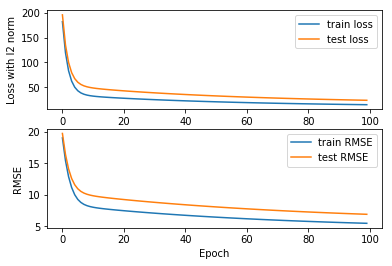

Figure of {'eta': 0.05, 'lamda': 0.01}


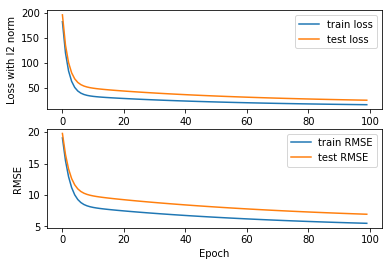

Figure of {'eta': 0.05, 'lamda': 0.1}


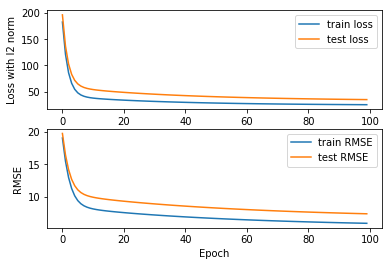

Figure of {'eta': 0.05, 'lamda': 0.5}


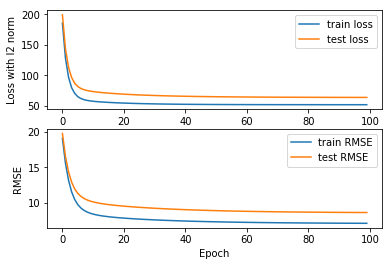

Figure of {'eta': 0.05, 'lamda': 1}


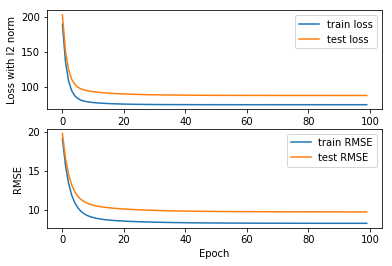

In [2]:
# write your code here#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Dec  2 09:58:38 2017

@author: wty
"""
import numpy as np 
import scipy  
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split,GridSearchCV

import LinearRegressor

data = load_svmlight_file("./resources/housing_scale.txt")
result_path = './results/regression_grid_search.csv'
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=5)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
init_w = np.random.normal(size=(num_features,1))

max_iterate = 100

param_grid = [
  {'lamda': [0, 0.01, 0.1, 0.5, 1], 'eta': [0.05, 0.1, 0.15, 0.2, 0.3]}
 ]


rgs = GridSearchCV(LinearRegressor.LinearRegressor(init_w,max_epoch=max_iterate), param_grid,return_train_score=True)
rgs.fit(X_train,Y_train)
result = pd.DataFrame(rgs.cv_results_)
result.sort_values('rank_test_score',inplace=True)

print ("Exhaustive Grid Search Result")
print ("The best estimator's parameter is",rgs.best_params_)
print (result.loc[:,['rank_test_score','mean_test_score','mean_train_score','mean_fit_time','params']])
result.to_csv(result_path)
print ("Result has been saved in",result_path)

print ("Printing the best 5 models loss curves")
for i in range(5):
    print ("Figure of",result.loc[i,'params'])
    regressor = LinearRegressor.LinearRegressor(init_w,max_epoch=max_iterate,**result.loc[i,'params'])
    regressor.fit(X_train,Y_train)
    loss_train = regressor.getLossHistory(X_train,Y_train)
    loss_test = regressor.getLossHistory(X_test,Y_test)
    RMSE_train = [-s for s in regressor.getScoreHistory(X_train,Y_train)]
    RMSE_test = [-s for s in regressor.getScoreHistory(X_test,Y_test)]
    
    plt.figure(i)
    plt.subplot(211)
    train_loss_line = plt.plot(range(max_iterate),loss_train,label='train loss')
    test_loss_line = plt.plot(range(max_iterate),loss_test,label='test loss')
    ax=plt.gca()
    ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
    plt.legend()
    
    plt.subplot(212)
    train_RMSE_line = plt.plot(range(max_iterate),RMSE_train,label='train RMSE')
    test_RMSE_line = plt.plot(range(max_iterate),RMSE_test,label='test RMSE')
    ax=plt.gca()
    ax.set(xlabel='Epoch', ylabel='RMSE')
    plt.legend()
    
    plt.show()
